# Student Details


*   Name:Muhammad Aslah M
*   Roll Number:231110
*   Emial ID:muhammada.cs23@duk.ac.in



# Question

1.   Perform exploratory data analysis **[7 Marks]**
2.   Make an appropriate logistic regression model for the given data **[8 Marks]**
3. Draw the decision boundary along with data **[4 Marks]**
4. Estimate the model performance **[6 marks]**

DataSet: binary_classification_dataset.csv

##1: Exploratory data analysis


In [157]:
# Your code
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/Users/aslahmp/Documents/college/class/pa/binary_classification_dataset.csv')

# Display the first 5 rows of the DataFrame
print(df.head())

# Display the summary statistics of the DataFrame
print(df.describe())

# Display the data types of each column
print(df.dtypes)
print(df['Target'].unique())
indices_to_remove = df[df['Target'].isna()].index

# Remove these rows
df = df.drop(indices_to_remove)
# Check for missing values
print(df.isnull().sum())




   Feature1  Feature2 Target
0    1.7250       520    Yes
1    1.8875       428     No
2    1.6000       552    Yes
3    1.4250       500     No
4    1.7750       628     No
           Feature1     Feature2
count   1020.000000  1020.000000
mean      11.436679   520.988235
std      313.061049    69.793442
min        1.250000   400.000000
25%        1.450000   464.000000
50%        1.637500   520.000000
75%        1.828125   584.000000
max    10000.000000   640.000000
Feature1    float64
Feature2      int64
Target       object
dtype: object
['Yes' 'No' nan]
Feature1    0
Feature2    0
Target      0
dtype: int64


<Axes: xlabel='Feature1', ylabel='Feature2'>

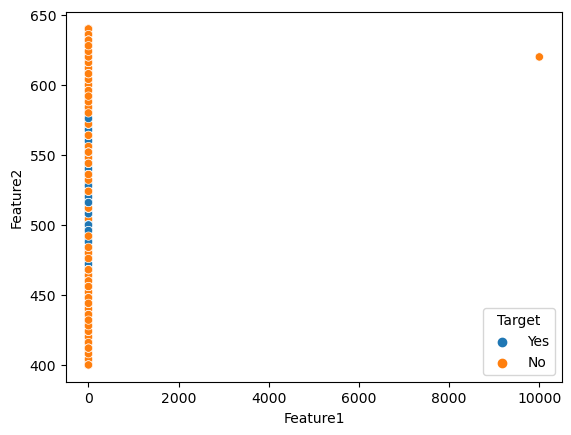

In [158]:
sns.scatterplot(x='Feature1',y='Feature2',hue='Target',data=df)

In [159]:
df = df[df['Feature1'] != 10000.000000]

# Check the remaining rows
print(df.shape)

(999, 3)


<Axes: xlabel='Feature1', ylabel='Feature2'>

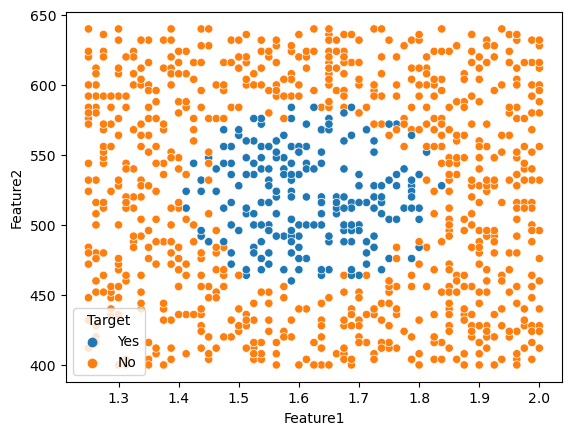

In [160]:
sns.scatterplot(x='Feature1',y='Feature2',hue='Target',data=df)

In [161]:
# from sklearn.preprocessing import StandardScaler

# numerical_features = ['Feature1', 'Feature2']
# data_to_normalize = df[numerical_features]

# scaler = StandardScaler()

# normalized_data = scaler.fit_transform(data_to_normalize)

# df[numerical_features] = normalized_data

# print(df.head())

<Axes: xlabel='Feature1', ylabel='Feature2'>

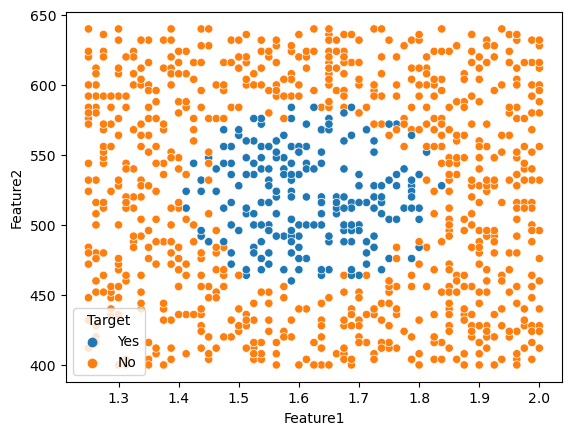

In [162]:
sns.scatterplot(x='Feature1',y='Feature2',hue='Target',data=df)

In [163]:
print(df['Target'].unique())

['Yes' 'No']


In [164]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Transform the target variable
df['Target'] = label_encoder.fit_transform(df['Target'])

# Display the transformed DataFrame
df.head()

,Feature1,Feature2,Target
0,1.7250,520,1
1,1.8875,428,0
2,1.6000,552,1
3,1.4250,500,0
4,1.7750,628,0


In [165]:
print(df.describe())
print(df.dtypes)

         Feature1    Feature2      Target
count  999.000000  999.000000  999.000000
mean     1.634547  521.109109    0.215215
std      0.220714   70.005347    0.411177
min      1.250000  400.000000    0.000000
25%      1.450000  464.000000    0.000000
50%      1.637500  520.000000    0.000000
75%      1.831250  584.000000    0.000000
max      2.000000  640.000000    1.000000
Feature1    float64
Feature2      int64
Target        int64
dtype: object


In [166]:
# df['Feature1'] = df['Feature1'] ** 2
# df['Feature2'] = df['Feature2'] ** 2

<Axes: xlabel='Feature1', ylabel='Feature2'>

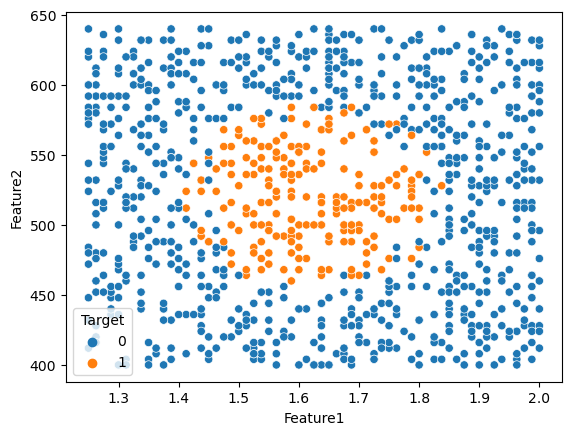

In [167]:
sns.scatterplot(x='Feature1',y='Feature2',hue='Target',data=df)

* **Which methods did you use in this step?**

> 1. Display the first 5 rows of the DataFrame
> 2. Display the summary statistics of the DataFrame
> 3. Check for missing values
> 4. Removed missing values
> 5. plot 
> 6. Feature1 have one out layer removed that

##2: Logistic regression model

* **Write down the model you are going to use in this step.**

$$
\hat{y}(x) = \frac{1}{1 + e^{-(\beta_0 + \beta_1x + \beta_2x^2 )}}
$$

In [168]:
# implement the logistic regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
# Assuming df is your DataFrame, 'Feature1' and 'Feature2' are your features, and 'Target' is your target variable
X = df[['Feature1', 'Feature2']]
y = df['Target']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Create a Logistic Regression model
degree =2  # Degree of the polynomial features (adjust as necessary)
model = make_pipeline(StandardScaler(),  PolynomialFeatures(degree), LogisticRegression())




# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')

Accuracy: 0.94


##3: Draw the decision boundary

Note: You are free to use any package or you can code it

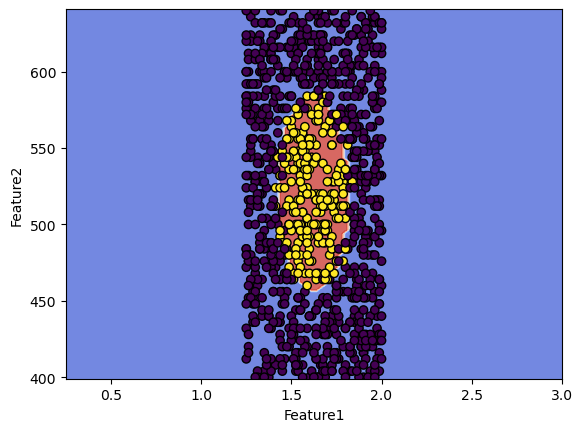

In [169]:
# your code

from sklearn.inspection import DecisionBoundaryDisplay

# Create DecisionBoundaryDisplay object
disp = DecisionBoundaryDisplay.from_estimator(
    model,
    X,
    response_method="predict",
    cmap=plt.cm.coolwarm,
    alpha=0.8,
    xlabel="Feature1",
    ylabel="Feature2",
)

# Make a scatter plot of the data
disp.ax_.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolor="k")

##4: Model performance





In [170]:
# your code
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")



Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        78
           1       0.90      0.82      0.86        22

    accuracy                           0.94       100
   macro avg       0.93      0.90      0.91       100
weighted avg       0.94      0.94      0.94       100

Accuracy: 0.94
Precision: 0.9
Recall: 0.8181818181818182
F1 Score: 0.8571428571428572


* **Write two sentences about the model's performance based on the metric you used to evaluate it.**

> * the model have good accuracy,Precision,Recall and F1 Score, the precision and recall scores indicate that the model could be improved